In [1]:
import scvelo as scv
import pandas as pd 
import numpy as np
from anndata import AnnData
import loompy
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.patches as mpatches
import pickle
import os

from scipy import sparse
from IPython.display import SVG
# import community
# import gseapy as gp
# import autograd
# from autograd import grad, jacobian
from sklearn.linear_model import LinearRegression
from scipy import stats,signal
# from community import community_louvain
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cross_decomposition import PLSRegression

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import scanpy
# from filter_dispersion import filter_dispersion
from scipy.sparse import issparse
from scvelo.preprocessing.utils import get_mean_var,materialize_as_ndarray
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
data_path='data/'
result_path='results/'

In [3]:
adata_all=scv.read('DentateGyrus.loom', cache=True)
adata_all.var_names_make_unique()

In [4]:
adata_all

AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [5]:
adata0_P0=adata_all[(adata_all.obs['Age']=='P0'),:]
adata0_P5=adata_all[(adata_all.obs['Age']=='P5'),:]

In [6]:
adata0_P5.obs['SampleID']

CellID
10X84_2:AAATGCCAGGTGCTAGx    10X84_2
10X84_2:AAAGCAATCATTATCCx    10X84_2
10X84_2:AAACCTGAGTTGAGTAx    10X84_2
10X84_2:AACACGTGTTATCGGTx    10X84_2
10X84_2:AAAGTAGAGCTCAACTx    10X84_2
                              ...   
10X84_3:TTTCCTCCACCATCCTx    10X84_3
10X84_3:TTTGTCACATGAAGTAx    10X84_3
10X84_3:TTTCCTCCACGGTAAGx    10X84_3
10X84_3:TTTGTCAAGCGTCAAGx    10X84_3
10X84_3:TTTCCTCGTGAAAGAGx    10X84_3
Name: SampleID, Length: 10100, dtype: category
Categories (2, object): ['10X84_2', '10X84_3']

In [7]:
adata_P0=adata0_P0[adata0_P0.obs['SampleID']=='10X83_3',:]
adata_P5=adata0_P5[adata0_P5.obs['SampleID']=='10X84_2',:]
print(np.unique(adata0_P0.obs['ClusterName']))

np.unique(adata0_P0.obs['ClusterName'])

['CA' 'CA1-Sub' 'CA2-3-4' 'GlialProg' 'Granule' 'ImmAstro' 'ImmGranule1'
 'ImmGranule2' 'Nbl1' 'Nbl2' 'OPC' 'RadialGlia' 'RadialGlia2' 'nIPC']


array(['CA', 'CA1-Sub', 'CA2-3-4', 'GlialProg', 'Granule', 'ImmAstro',
       'ImmGranule1', 'ImmGranule2', 'Nbl1', 'Nbl2', 'OPC', 'RadialGlia',
       'RadialGlia2', 'nIPC'], dtype=object)

In [8]:
t_list=['RadialGlia','nIPC','Nbl1','Nbl2', 'ImmGranule1', 'ImmGranule2','Granule']#'RadialGlia2',

In [9]:
adata0=adata_P5[(adata_P5.obs['ClusterName']=='RadialGlia') \
#                 +(adata_P5.obs['ClusterName']=='RadialGlia2')\
                +(adata_P5.obs['ClusterName']=='nIPC')\
                +(adata_P5.obs['ClusterName']=='Nbl1')\
                +(adata_P5.obs['ClusterName']=='Nbl2')\
#                 +(adata_P5.obs['ClusterName']=='CA')\
#                 +(adata_P5.obs['ClusterName']=='CA2-3-4')\
#                 +(adata_P5.obs['ClusterName']=='CA1-Sub'),:]
                +(adata_P5.obs['ClusterName']=='ImmGranule1')\
                +(adata_P5.obs['ClusterName']=='ImmGranule2')\
                +(adata_P5.obs['ClusterName']=='Granule'),:]


In [10]:
# cell_inds=np.random.choice(adata0.shape[0],size=5000)
# cell_inds=np.arange(adata0.shape[0])

In [11]:
adata1=adata0.copy()#[cell_inds]
scv.pp.remove_duplicate_cells(adata1)
scv.pp.filter_and_normalize(adata1,min_shared_counts=20,n_top_genes=2000)
# scv.pp.filter_genes(adata1, min_shared_counts=10)
# scv.pp.normalize_per_cell(adata1)
# scv.pp.filter_genes_dispersion(adata1, n_top_genes=2000)
# scv.pp.log1p(adata1)

# scv.pp.filter_and_normalize(adata1,min_shared_counts=20,n_top_genes=1000)#min_shared_cells=150, 
# sc.pp.combat(adata1, key='batch')
print(adata1.X.shape)
scv.pp.neighbors(adata1, n_neighbors=20)
# adata1.uns['neighbors']['connectivities']=adata1.obsp['connectivities']
scv.pp.pca(adata1,n_comps=50)
scv.pp.moments(adata1, n_pcs=50, n_neighbors=20)

Filtered out 22457 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
(3184, 2000)
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [12]:
Xs=adata1.layers['Ms']
n_bins=20
means=np.mean(Xs,axis=0)
bin_edges=np.quantile(means,np.linspace(0,1,n_bins+1)).tolist()
bin_edges[-1]+=1e-6
gene_bin_label=np.digitize(means, bins=bin_edges)


[0.8008729107139599, 0.9680274269912048, 0.8866048877150041, 0.9122952982727327, 0.8614811195980715, 0.8752494996560399, 0.9486475927883166, 1.0174051041497116, 1.0207314735241804, 1.0507295375462495, 0.986823167465586, 1.0173812423119706, 1.0232012444096992, 1.0804171054347458, 1.1889577487007796, 1.2902443896252824, 1.2771196828807663, 1.3606084276628974, 1.393826509597381, 1.4314955526941693] [0.3394031391253684, 0.37369862039980967, 0.3585489489643102, 0.3416821684638359, 0.3726362421364099, 0.34493161384261883, 0.3576855279352757, 0.34148321253182473, 0.3691035521057076, 0.3437573098106917, 0.33110351071091904, 0.3326741160368058, 0.32427478983283625, 0.28500718032961864, 0.26901596835813574, 0.22682990074391304, 0.24712441267118904, 0.15522962228575454, 0.15005954498301424, 0.1302376756273843]


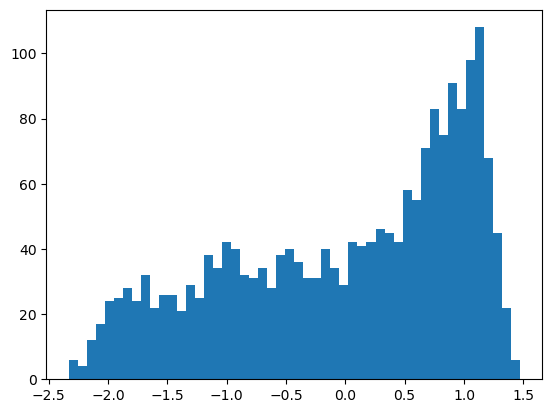

In [13]:
scaler=StandardScaler()#MinMaxScaler()#
X=scaler.fit_transform(Xs)
X_corr=np.corrcoef(X, rowvar=False)
corr_range=np.sort(X_corr,axis=1)[:,-3]-0.75*np.min(X_corr,axis=1)
mu_c=[]
sigma_c=[]
for bl in np.unique(gene_bin_label):
    mu_c.append(np.mean(corr_range[gene_bin_label==bl]))
    sigma_c.append(np.std(corr_range[gene_bin_label==bl]))
print(mu_c,sigma_c)    
z_score=[]
for i in range(len(corr_range)):
    z_score.append((corr_range[i]-np.mean(corr_range))/np.std(corr_range))
#     z_score.append((corr_range[i]-mu_c[gene_bin_label[i]-1])/sigma_c[gene_bin_label[i]-1])

plt.hist(z_score,bins=50)
plt.show()

In [14]:
gene_corr=adata1.var.index.values[np.array(z_score)>0.5]

In [15]:
adata=adata0.copy()[:,gene_corr]#[cell_inds]
scv.pp.remove_duplicate_cells(adata)
scv.pp.normalize_per_cell(adata)
scv.pp.log1p(adata)
scv.pp.neighbors(adata, n_neighbors=20)
# adata.uns['neighbors']['connectivities']=adata.obsp['connectivities']
scv.pp.pca(adata,n_comps=50)
scv.pp.moments(adata, n_pcs=50, n_neighbors=20)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


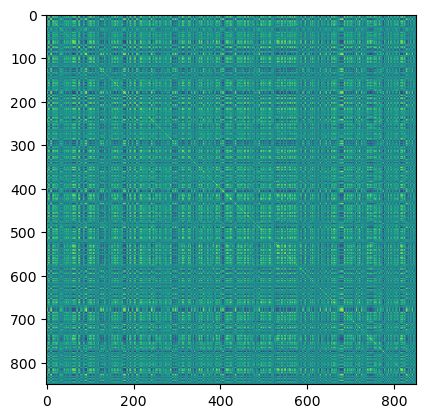

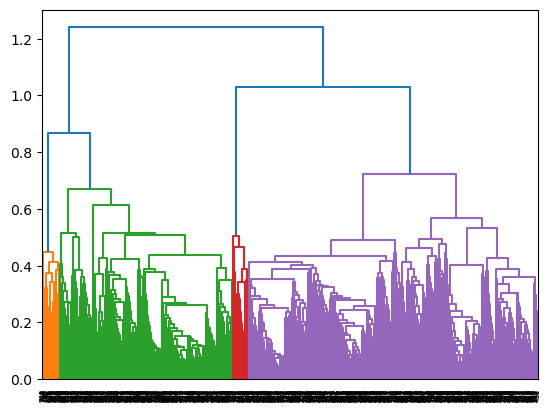

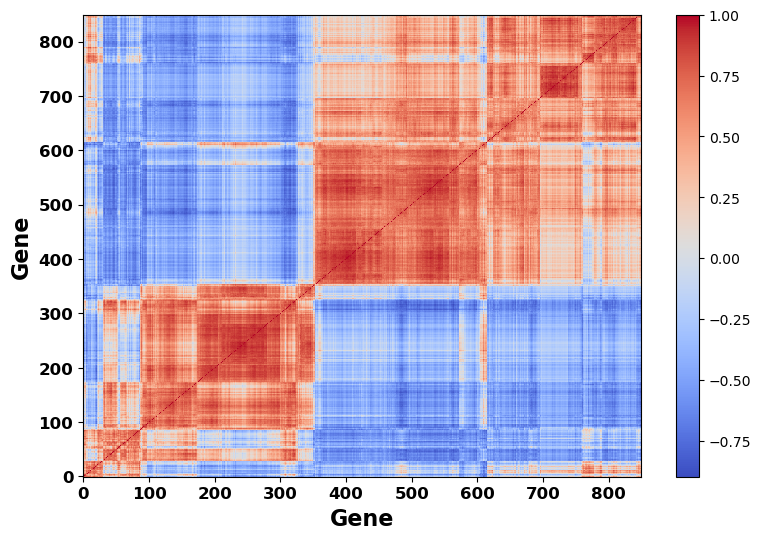

In [16]:
Xs=adata.layers['Ms']
scaler=StandardScaler()#MinMaxScaler()#
X=scaler.fit_transform(Xs)
X_corr=np.corrcoef(X, rowvar=False)
plt.imshow(X_corr)
plt.show()

Z=linkage((1-X_corr)[np.triu_indices(X_corr.shape[0],k=1)],method='weighted')#method='weighted')
dg=dendrogram(Z)
X_re= X[:,dg['leaves']]#X_re reorder X by clustering

X_corr_re=np.corrcoef(X_re, rowvar=False)

plt.figure(figsize=(9,6))
plt.imshow(X_corr_re, aspect='auto', cmap=plt.cm.coolwarm, interpolation='nearest',origin='lower')

plt.xlabel('Gene',fontsize=16,fontweight='bold')
plt.ylabel('Gene',fontsize=16,fontweight='bold')

plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.colorbar()
plt.show()

In [18]:
from tqdm import tqdm, trange
from kneed import KneeLocator
def findElbow(y):
    x = range(1, len(y) + 1)
    kn = KneeLocator(x, y, curve='convex', direction='decreasing')
    return kn.knee
def runStepwiseReg(ggc):

    # Initialize variables
    ggc_cols = ggc.shape[1]
    ggc_rows = ggc.shape[0]
    ggc_centered = ggc - np.tile(ggc.mean(axis=0), (ggc_rows, 1))
    step = 1
    num_steps = 100
    num_regressions = 30
    step_seq = range(step, num_steps+1, step)
    scree_values = [np.linalg.norm(ggc_centered)]
    feature_genes = []

#     # Progress bar
#     print("\nRunning Stepwise Regression...")
#     pbar = tqdm(total=num_regressions)
    
    # For each step in the stepwise regression process
    for i in step_seq:
        if i < num_regressions:
#             # Update progress bar
#             pbar.update(1)
            
            # Compute GGC'*GGC
            ggc_ggc = np.dot(ggc_centered.T, ggc_centered)
    
            # Compute variance explained
            gcNormVec = np.apply_along_axis(np.linalg.norm, 0, ggc_ggc)
            
            # Compute norm of gene vectors
            gNormVec = np.sqrt(np.abs(np.diagonal(ggc_ggc)))
            
            # Select gene to regress out
            varExpVec = gcNormVec / gNormVec
            regressed_genes = np.argsort(varExpVec)[::-1][:step]
            
            # Add regressed gene to feature set
            feature_genes = np.union1d(feature_genes, regressed_genes)
            
            # Obtain the variance explained by the regressed genes
            regressed_g = ggc_centered[:, regressed_genes]
            gtg = np.dot(regressed_g.T, regressed_g).item()
            explained = np.dot(regressed_g, ggc_ggc[regressed_genes, :]) / gtg
            eps = ggc_centered - explained
            
            # Append variance explained value to vector for scree plot
            scree_values.append(np.sum(varExpVec[regressed_genes]))
            
            # Update the GGC to be the residual after regressing out these genes
            ggc_centered = eps

        else:
#             pbar.update(1)
            scree_values.append(scree_values[num_regressions-1])
    

    
    feature_genes=feature_genes.astype(np.int16)

    # Filter scree_values
    scree_values = [value for value in scree_values if value != 0]

    # Find elbow point
    elbow_id = findElbow(np.log(scree_values)[:num_steps])

    # In case elbow is beyond set of feature genes
    if elbow_id > len(feature_genes):
        elbow_id = len(feature_genes)

    # Initialise variables to add neighbours
    elbow_feature_genes = feature_genes[:elbow_id]
    neighbour_feature_genes = elbow_feature_genes.tolist()
    
    
    # Get list of GGC
    ggc_list=np.abs(ggc.copy())
    ggc_list[neighbour_feature_genes,:]=0#np.delete(ggc,neighbour_feature_genes,axis=0)
#     # Select potential candidates for next neighbour
    candidateGGCList = [[np.argmax(ggc_list[:,i]),np.max(ggc_list[:,i])] for i in neighbour_feature_genes]

#     # Progress bar
# #     print("\nAdding correlated features...")
    max_ggc = ggc.shape[0] - len(neighbour_feature_genes)
#     pbar = tqdm(total=max_ggc)

    # Adding neighbours of each gene
    for i in range(max_ggc):

        # Update progress bar
#         pbar.update(1)

        # Select potential candidates for next neighbour
        candidateGGCNames = [item[0] for item in candidateGGCList]
        candidateGGCVec = [item[1] for item in candidateGGCList]

        # Select candidate with largest correlation to feature set
        nearest_index = np.argmax(candidateGGCVec)
        whoseCandidate = candidateGGCNames[nearest_index]
        nearestNeighbour = candidateGGCVec[nearest_index]
#         print(whoseCandidate)

        # Add new neighbour to feature set, and remove from next neighbour candidate list
        neighbour_feature_genes.append(whoseCandidate)

        # Update GGC list
        ggc_list[whoseCandidate,:]=0 #np.delete(ggc_list,whoseCandidate,axis=0)
        

        # Update list of nearest neighbour candidates
        candidateGGCList = [[np.argmax(ggc_list[:,i]),np.max(ggc_list[:,i])] for i in neighbour_feature_genes]

#     pbar.close()
    print("\nDone.")
#     neighbour_feature_genes.append()

    return feature_genes,neighbour_feature_genes,elbow_id

In [19]:
feature_genes,order_genes,scree_values=runStepwiseReg(X_corr)
print(order_genes)


Done.
[23, 46, 111, 142, 160, 177, 224, 226, 249, 267, 311, 362, 393, 394, 451, 505, 517, 549, 595, 603, 610, 625, 630, 716, 778, 16, 554, 248, 26, 234, 649, 843, 457, 576, 528, 118, 264, 579, 722, 655, 77, 98, 587, 306, 666, 702, 209, 5, 337, 145, 536, 759, 239, 67, 518, 684, 679, 268, 262, 189, 758, 152, 155, 449, 319, 845, 563, 785, 205, 28, 455, 647, 769, 108, 62, 669, 242, 280, 400, 250, 504, 809, 448, 412, 500, 97, 435, 170, 399, 333, 817, 187, 513, 823, 40, 453, 784, 355, 121, 479, 360, 373, 537, 127, 3, 714, 768, 275, 147, 545, 812, 841, 677, 665, 126, 330, 620, 450, 781, 493, 76, 804, 297, 478, 516, 358, 535, 793, 685, 541, 179, 392, 25, 370, 801, 760, 167, 216, 522, 321, 266, 762, 639, 130, 487, 225, 660, 465, 417, 0, 678, 681, 198, 149, 771, 443, 467, 369, 674, 283, 498, 350, 107, 821, 285, 464, 93, 55, 667, 181, 594, 188, 215, 475, 463, 375, 24, 339, 66, 816, 49, 532, 57, 474, 724, 828, 605, 230, 2, 43, 87, 292, 89, 506, 47, 133, 92, 403, 797, 223, 260, 426, 725, 548, 345,

In [20]:
# xf=X[:,feature_genes.astype(np.int16)]
# xf_corr=np.corrcoef(xf, rowvar=False)
# Z=linkage((1-xf_corr)[np.triu_indices(xf_corr.shape[0],k=1)],method='weighted')#method='weighted')
# dg=dendrogram(Z)

# xf_re= xf[:,dg['leaves']]
# xf_corr_re=np.corrcoef(xf_re, rowvar=False)

# plt.imshow(xf_corr_re)
# plt.show()

In [21]:
adata=adata0.copy()[:,gene_corr[order_genes[:600]]]#[cell_inds]
print(adata.shape)
scv.pp.remove_duplicate_cells(adata)
scv.pp.normalize_per_cell(adata)
scv.pp.log1p(adata)
scv.pp.neighbors(adata, n_neighbors=20)
# adata.uns['neighbors']['connectivities']=adata.obsp['connectivities']
scv.pp.pca(adata,n_comps=50)
scv.pp.moments(adata, n_pcs=50, n_neighbors=20)

(3184, 600)
Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [22]:
scv.tl.umap(adata)
# scv.tl.recover_dynamics(adata)

scv.tl.velocity(adata,mode='stochastic',perc=[5, 95])

scv.tl.velocity_graph(adata,xkey='Ms')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/3184 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


C:\Users\dell\anaconda3\lib\site-packages\scvelo\plotting\utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


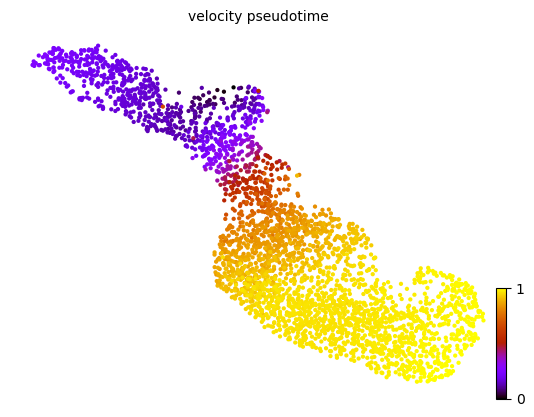

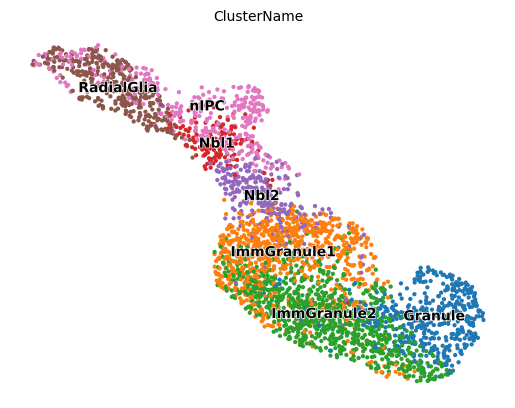

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


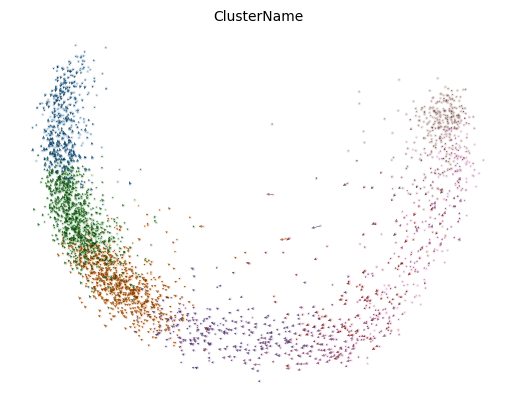

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


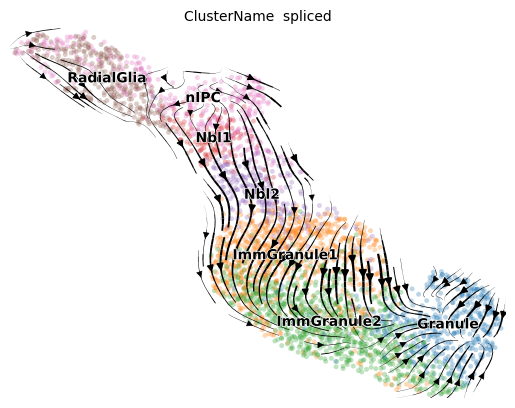

In [23]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, basis='umap',color='velocity_pseudotime', color_map='gnuplot')
# scv.tl.latent_time(adata)
# scv.pl.scatter(adata, basis='pca',color='latent_time', color_map='jet', size=80)
scv.pl.scatter(adata, basis='umap',color='ClusterName')

scv.pl.velocity_embedding(adata, basis='pca',color='ClusterName')

scv.pl.velocity_embedding_stream(adata, basis='umap',color='ClusterName',s=50,layer='spliced',color_map='jet')

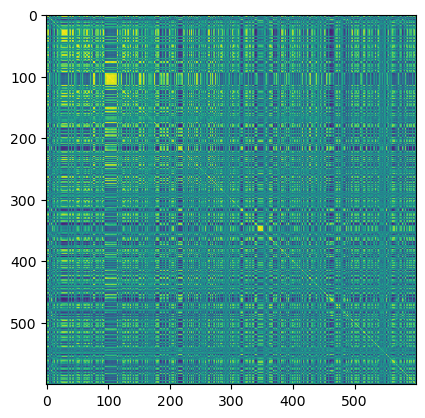

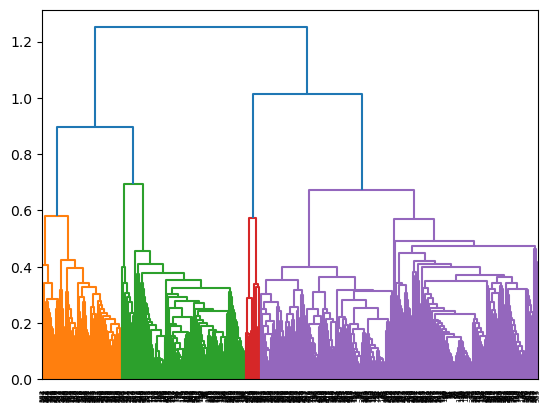

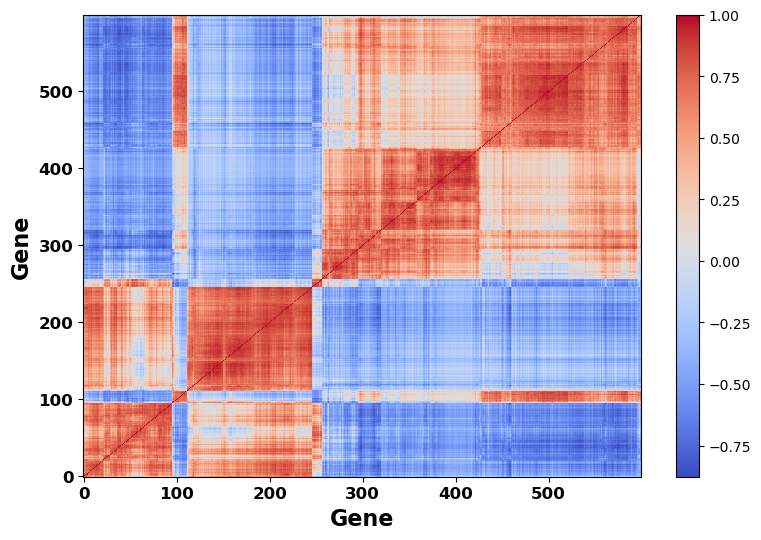

In [24]:
Xs=adata.layers['Ms']
scaler=StandardScaler()#MinMaxScaler()#
X=scaler.fit_transform(Xs)
X_corr=np.corrcoef(X, rowvar=False)
plt.imshow(X_corr)
plt.show()

Z=linkage((1-X_corr)[np.triu_indices(X_corr.shape[0],k=1)],method='weighted')#method='weighted')
dg=dendrogram(Z)
X_re= X[:,dg['leaves']]#X_re reorder X by clustering

X_corr_re=np.corrcoef(X_re, rowvar=False)

plt.figure(figsize=(9,6))
plt.imshow(X_corr_re, aspect='auto', cmap=plt.cm.coolwarm, interpolation='nearest',origin='lower')

plt.xlabel('Gene',fontsize=16,fontweight='bold')
plt.ylabel('Gene',fontsize=16,fontweight='bold')

plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.colorbar()
plt.show()

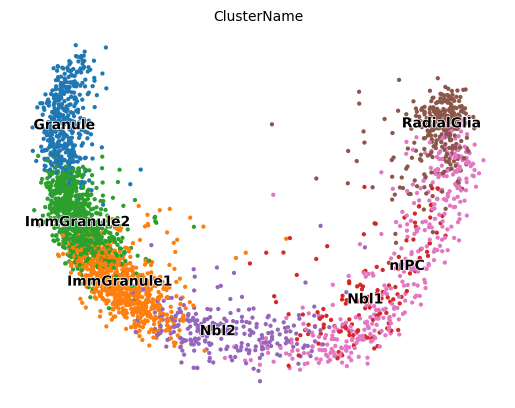

In [25]:
scv.pl.scatter(adata, basis='pca',color='ClusterName')#,dpi=300,save='DG_scatter.png'

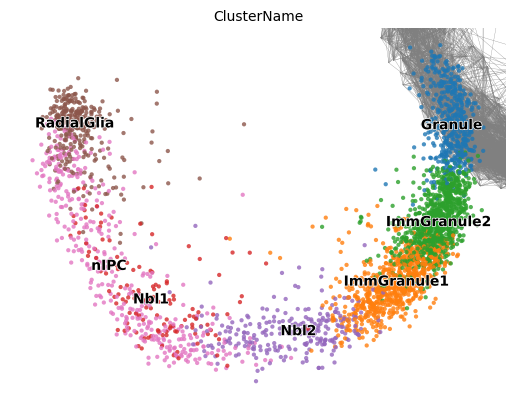

In [26]:
adata.obsm['X_pca'][:,0]=-adata.obsm['X_pca'][:,0]
scv.pl.velocity_graph(adata, basis='pca',color='ClusterName')#,dpi=300,save='DG_vgraph.png'
#plt.savefig(result_path+'DG_vgraph.png',dpi=300)

In [28]:
adata.write_h5ad('DG_new.h5ad')#h5ad save all features

In [ ]:
# X0_bin=X0_bin[:,cmask]

# np.save(result_path+'DG_X0_bin.npy',X0_bin)
# X0_bin.shape

In [30]:
import pandas as pd
df=pd.read_csv('TF_list.csv')
TF=df.loc[df['isTF']=='Yes','Name'].values


gene_list=np.array([x.upper() for x in adata.var.index.values])
gene_list[np.in1d(gene_list,TF)]

tf_inds=np.where(np.in1d(gene_list,TF))[0]
print(tf_inds.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'TF_list.csv'